In [1]:
import pandas as pd
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

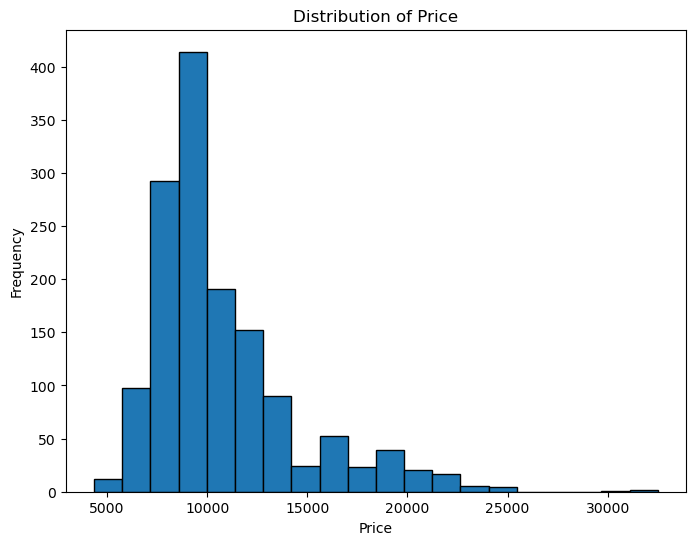

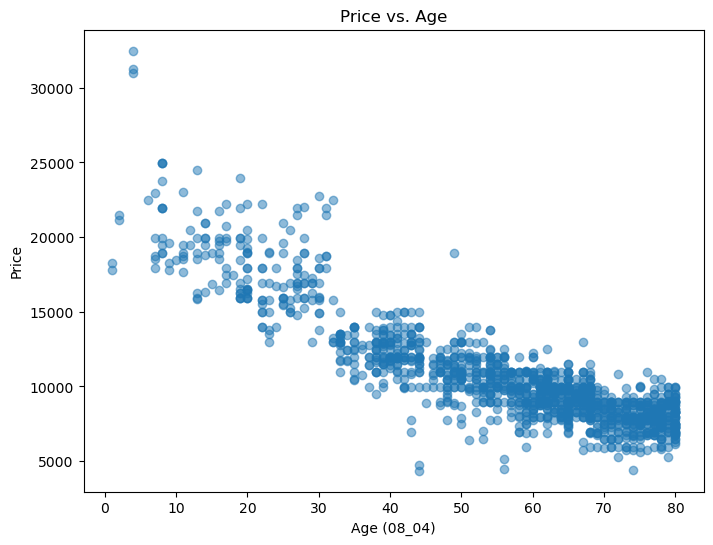

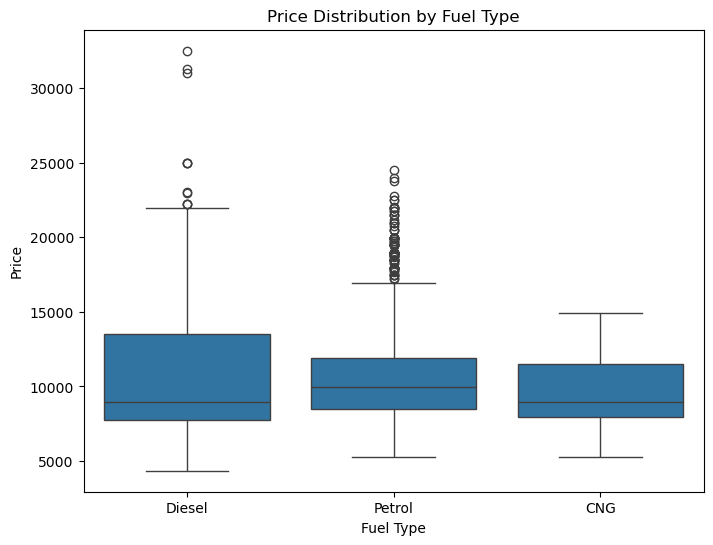

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


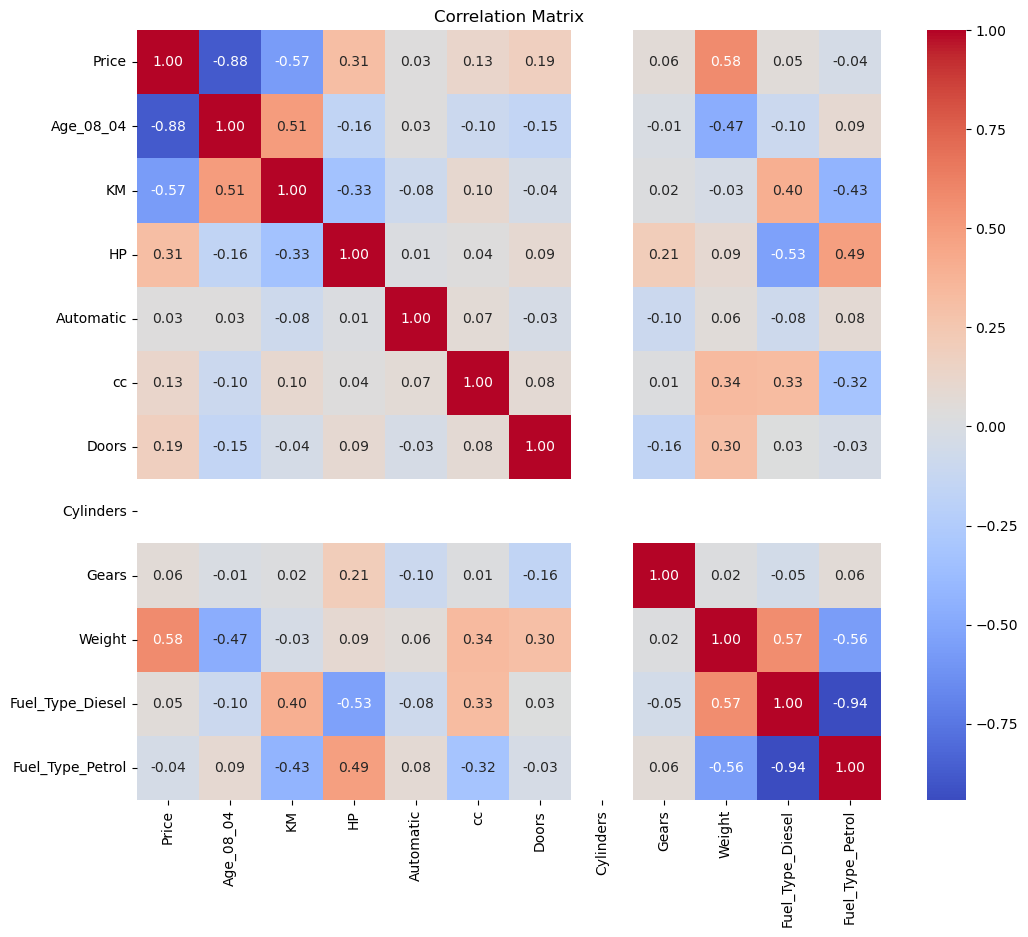

   Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
0  13500         23  46986  90          0  2000      3          4      5   
1  13750         23  72937  90          0  2000      3          4      5   
2  13950         24  41711  90          0  2000      3          4      5   
3  14950         26  48000  90          0  2000      3          4      5   
4  13750         30  38500  90          0  2000      3          4      5   

   Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    1165               1.0               0.0  
1    1165               1.0               0.0  
2    1165               1.0               0.0  
3    1165               1.0               0.0  
4    1170               1.0               0.0  


In [1]:
#  1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's in the same directory)
df = pd.read_csv("ToyotaCorolla - MLR.csv")

# Display the first few rows of the dataframe
df.head()

# Exploratory Data Analysis (EDA)

# 1. Summary statistics
print(df.describe())

# 2. Data types of columns
print(df.info())

# 3. Missing value analysis
print(df.isnull().sum())

# 4. Visualizations
# Histogram of Price
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()


# Scatter plot of Price vs. Age
plt.figure(figsize=(8, 6))
plt.scatter(df['Age_08_04'], df['Price'], alpha=0.5)
plt.xlabel('Age (08_04)')
plt.ylabel('Price')
plt.title('Price vs. Age')
plt.show()

# Box plot of Price for different Fuel Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Price Distribution by Fuel Type')
plt.show()

# Preprocessing for MLR

# 1. Handling Missing Values (if any)


# 2. Encoding Categorical Variables
# Using One-Hot Encoding
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True, dtype=float) # Example: Convert to float after encoding



# 3. Feature Scaling (if necessary)
# Example using standardization:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Print the column names of the DataFrame
print(df.columns)  # Print the column names to identify the correct one

# Select numerical features to scale
# Correct the column name 'Quarterly_Tax' if it's different in your DataFrame
numerical_features = ['Age_08_04','KM', 'HP', 'cc', 'Doors','Gears','Quarterly_Tax','Weight'] 


# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
# Calculate correlation on numeric features only
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Display the preprocessed dataframe
print(df.head())

In [3]:
#  2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

from sklearn.model_selection import train_test_split

# Assuming 'Price' is your target variable
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state for reproducibility

# Now you have X_train, X_test, y_train, and y_test for your model training and evaluation.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1148, 11) (288, 11) (1148,) (288,)


In [13]:
#  3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: All features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1 - All Features:")
print(f"Mean Squared Error: {mse1}")
print(f"R-squared: {r2_1}")
print("Coefficients:", model1.coef_)
print("\n")


# Model 2: Selected features based on correlation analysis 

corr_matrix = df.corr()
selected_features = corr_matrix['Price'][abs(corr_matrix['Price']) > 0.5].index.tolist()
selected_features.remove('Price')  # Remove the target variable itself

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model2 = LinearRegression()
model2.fit(X_train_selected, y_train)
y_pred2 = model2.predict(X_test_selected)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)


print("Model 2 - Selected Features:")
print(f"Mean Squared Error: {mse2}")
print(f"R-squared: {r2_2}")
print("Coefficients:", model2.coef_)
print("\n")


# Model 3:  Another set of selected features
# Example: Features related to car age, mileage, and engine size
selected_features_3 = ['Age_08_04', 'KM', 'cc', 'HP']
X_train_selected_3 = X_train[selected_features_3]
X_test_selected_3 = X_test[selected_features_3]

model3 = LinearRegression()
model3.fit(X_train_selected_3, y_train)
y_pred3 = model3.predict(X_test_selected_3)
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("Model 3 - Selected Features (Age, KM, cc, HP):")
print(f"Mean Squared Error: {mse3}")
print(f"R-squared: {r2_3}")
print("Coefficients:", model3.coef_)


Model 1 - All Features:
Mean Squared Error: 2203043.8231437025
R-squared: 0.8348888040611082
Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -1.10844667e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]


Model 2 - Selected Features:
Mean Squared Error: 2234953.0617259294
R-squared: 0.8324973071292439
Coefficients: [-1.17963603e+02 -2.46165664e-02  2.06475840e+01]


Model 3 - Selected Features (Age, KM, cc, HP):
Mean Squared Error: 2487907.576503589
R-squared: 0.81353916294059
Coefficients: [-1.51549147e+02 -1.25063485e-02  4.46496038e-01  3.36420101e+01]


In [7]:
#  4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

# Evaluate Model 1
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

mae1 = mean_absolute_error(y_test, y_pred1)
msle1 = mean_squared_log_error(y_test, y_pred1)

print("Model 1 - All Features:")
print(f"Mean Absolute Error: {mae1}")
print(f"Mean Squared Log Error: {msle1}")


# Evaluate Model 2
mae2 = mean_absolute_error(y_test, y_pred2)
msle2 = mean_squared_log_error(y_test, y_pred2)

print("\nModel 2 - Selected Features:")
print(f"Mean Absolute Error: {mae2}")
print(f"Mean Squared Log Error: {msle2}")


# Evaluate Model 3
mae3 = mean_absolute_error(y_test, y_pred3)
msle3 = mean_squared_log_error(y_test, y_pred3)

print("\nModel 3 - Selected Features (Age, KM, cc, HP):")
print(f"Mean Absolute Error: {mae3}")
print(f"Mean Squared Log Error: {msle3}")


Model 1 - All Features:
Mean Absolute Error: 990.8872739193927
Mean Squared Log Error: 0.017489366116298092

Model 2 - Selected Features:
Mean Absolute Error: 1020.5916300198205
Mean Squared Log Error: 0.018559359494563447

Model 3 - Selected Features (Age, KM, cc, HP):
Mean Absolute Error: 1104.9751754608424
Mean Squared Log Error: 0.01858880665312672


In [11]:
#  5.Apply Lasso and Ridge methods on the model.

from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=1.0)  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")
print("Coefficients:", lasso.coef_)


# Ridge Regression
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")
print("Coefficients:", ridge.coef_)


Lasso Regression:
Mean Squared Error: 2195387.2460865397
R-squared: 0.8354626403967389
Coefficients: [-1.20798032e+02 -1.63255341e-02  1.45592200e+01  1.33401454e+02
 -3.23988246e-02 -5.86731609e+01  0.00000000e+00  5.22177477e+02
  2.57219631e+01 -3.23101256e+01  1.36439171e+03]

Ridge Regression:
Mean Squared Error: 2199746.3702333295
R-squared: 0.8351359377712343
Coefficients: [-1.20779659e+02 -1.63240795e-02  1.41418340e+01  1.46907470e+02
 -3.05094386e-02 -5.99057913e+01  0.00000000e+00  5.42272328e+02
  2.58210194e+01 -1.28813072e+02  1.29494983e+03]


In [3]:
#Assignment Questions
# 1. What are the key hyperparameters in KNN?

#The key hyperparameters in KNN (k-Nearest Neighbors) are:

#1. k (number of neighbors): This is the most crucial hyperparameter.  It determines how many neighboring data points are considered when classifying a new data point. A small k can lead to overfitting (sensitive to noise), while a large k can lead to underfitting (smooth decision boundaries but might miss local patterns).  Optimal k is often found through techniques like cross-validation.

#2. Distance metric:  This determines how the distance between data points is calculated. Common metrics include:
   # Euclidean distance:  The straight-line distance between two points in Euclidean space.  Suitable for continuous data.
   # Manhattan distance: The sum of the absolute differences between the coordinates of two points. Less sensitive to outliers than Euclidean distance.
   # Minkowski distance: A generalization of Euclidean and Manhattan distances.  Allows for adjustable "p" value (order of the norm), where p=1 is Manhattan and p=2 is Euclidean.
   # Cosine similarity: Measures the angle between two vectors, useful for text data or high-dimensional data where magnitude is less important.
   # Hamming distance:  Applicable for categorical data, counting the number of positions at which corresponding symbols are different.

#3. Weight function: Determines how much influence each neighbor has on the classification or regression. Common options include:
 #   Uniform weights: All neighbors have equal weight.
  #  Distance weights: Closer neighbors have a greater influence.  Weight is inversely proportional to distance.



In [5]:
#  2. What distance metrics can be used in KNN?

#The distance metrics that can be used in KNN are:

#Euclidean distance:Suitable for continuous data.
#Manhattan distance: Less sensitive to outliers than Euclidean distance.
#Minkowski distance: A generalization of Euclidean and Manhattan distances.
#   Cosine similarity: Useful for text data or high-dimensional data.
#Hamming distance: Applicable for categorical data.
